In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import LabelEncoder , StandardScaler , OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

In [2]:
data = pd.read_csv('./data/train.csv')
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
data_test = pd.read_csv('./data/test.csv')
data_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [4]:
data = data.drop(['id','CustomerId','Surname'] , axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [6]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
category_features = ['Tenure', 'NumOfProducts','HasCrCard','IsActiveMember','Geography','Gender']

In [8]:
def convert_to_category(data,features):
    for i in features:
        data[i] = data[i].astype('category')

In [9]:
convert_to_category(data,category_features)

In [10]:
data.describe(include = 'category')

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember
count,165034,165034,165034,165034,165034.0,165034.0
unique,3,2,11,4,2.0,2.0
top,France,Male,2,2,1.0,0.0
freq,94215,93150,18045,84291,124428.0,82885.0


In [11]:
numberic_features = data.drop(category_features , axis = 1).columns
numberic_features = data[numberic_features].drop('Exited' , axis = 1).columns
numberic_features

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], dtype='object')

In [12]:
data[numberic_features].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,55478.086689,112574.822734
std,80.103340,8.867205,62817.663278,50292.865585
min,350.000000,18.000000,0.000000,11.580000
25%,597.000000,32.000000,0.000000,74637.570000
50%,659.000000,37.000000,0.000000,117948.000000
75%,710.000000,42.000000,119939.517500,155152.467500
max,850.000000,92.000000,250898.090000,199992.480000


<Axes: xlabel='Age', ylabel='Count'>

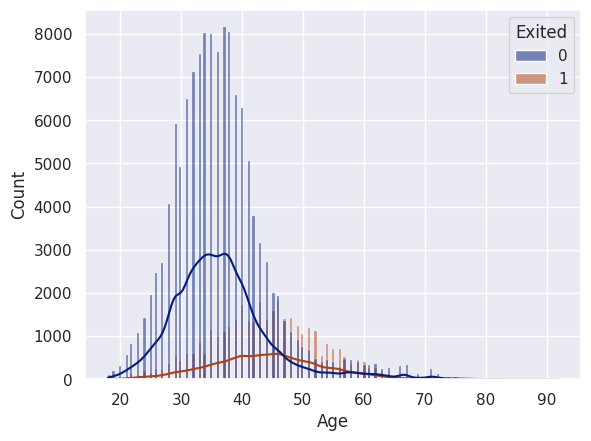

In [13]:
sns.histplot(data, x = 'Age' , hue = 'Exited' , kde = True , palette = 'dark')

(-9987.465000000002, 209991.52500000002, 0.0, 3741.15)

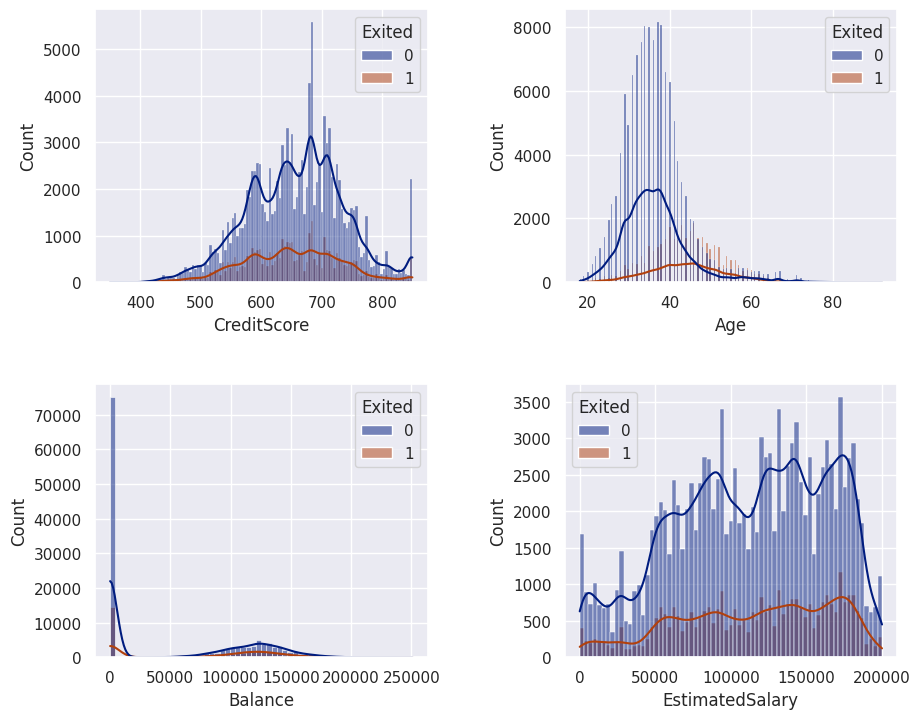

In [14]:
fig , ax = plt.subplots(2,2,figsize = (10,8))
count = 0
for i in range (0,2):
    for j in range (0,2):
        if(count<len(numberic_features)):
            sns.histplot(data , x = numberic_features[count] , hue = 'Exited',  ax = ax[i][j] , palette = 'dark' , kde = True)
            count+=1
        else:
            ax[i][j].axis('off')
            
plt.tight_layout( pad = 3)
plt.axis('tight')

In [15]:
balance_cut = pd.cut(data['Balance'] ,bins = [-1 , 50000 , 100000 ,150000, data['Balance'].max()],
                     labels = ['Low','Normal','High','Very High'])

<Axes: xlabel='Balance', ylabel='count'>

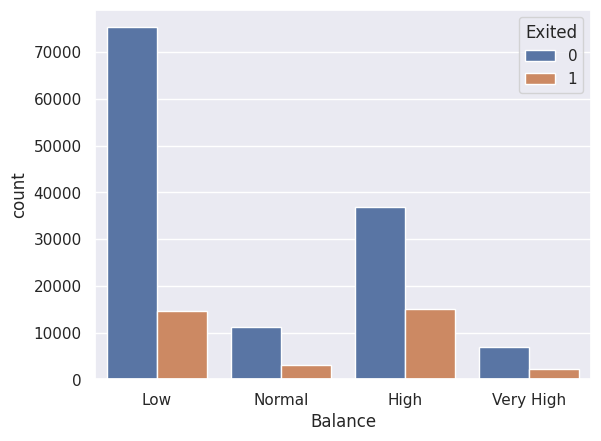

In [16]:
sns.countplot(x = balance_cut , hue = data['Exited'])

In [17]:
exited_old_age = data.loc[(data.Age >= 40) & (data.Exited == 1)]['Age'] 
exited_young_age = data.loc[(data.Age < 40) & (data.Exited == 1)]['Age']

In [18]:
mean1, mean2 = np.mean(exited_old_age), np.mean(exited_young_age)
std1, std2 = np.std(exited_old_age.std(), ddof=1), np.std(exited_young_age.std(), ddof=1)
n1, n2 = len(exited_old_age), len(exited_young_age)

z = (mean1 - mean2) / np.sqrt((std1**2/n1) + (std2**2/n2))

# alpha = 0.05 2 phía
if z <= 1.645:
    result = "H0"
else:
    result = "H1"

print(f'Result: {result}')

Result: H1


/usr/local/lib/python3.12/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


#### P(exited) : Mean Old age people > Mean Young age people (alpha = 0.05)

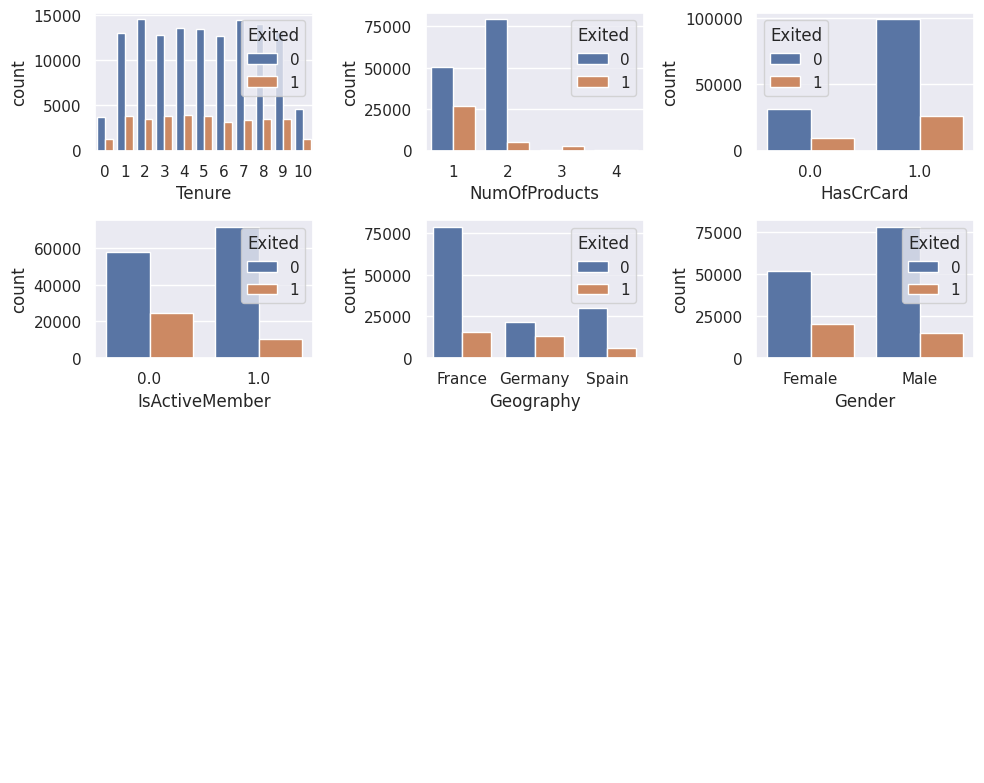

In [19]:
fig , ax = plt.subplots(4,3,figsize = (10,8))
count = 0
for i in range (0,4):
    for j in range (0,3):
        if(count<len(category_features)):
            sns.countplot(data , x = category_features[count] , hue = 'Exited',  ax = ax[i][j])
            count+=1
        else:
            ax[i][j].axis('off')
            
plt.tight_layout()

<Axes: xlabel='Age', ylabel='Balance'>

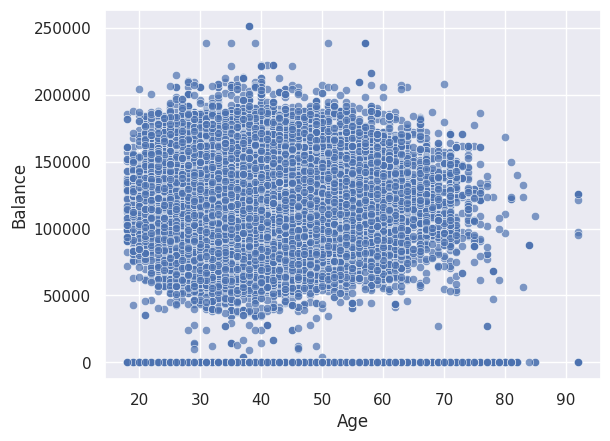

In [20]:
sns.scatterplot(data ,x = 'Age' , y = 'Balance' , alpha = 0.7)

<Axes: >

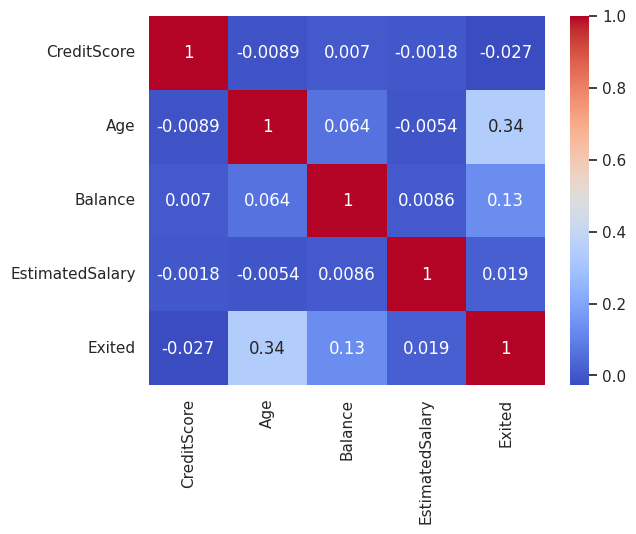

In [21]:
numberic_features_corr = data.drop(category_features , axis = 1 ).corr()
sns.heatmap(numberic_features_corr , cmap = 'coolwarm' , annot = True)

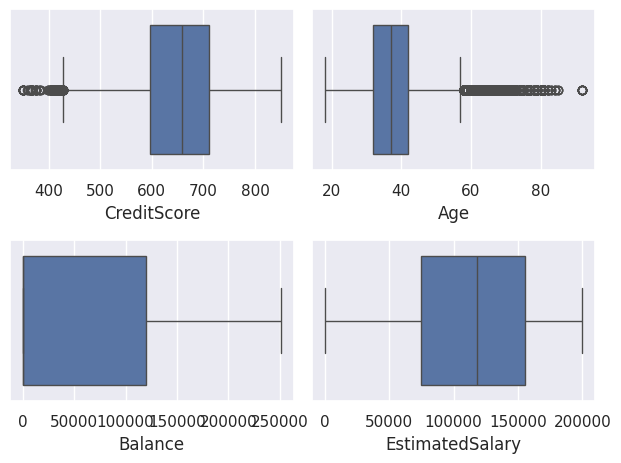

In [22]:
fig , ax = plt.subplots(2,2)

count = 0
for i in range(0,2):
    for j in range (0,2):
        if(count<len(numberic_features)):
            sns.boxplot(data , x = numberic_features[count] , ax = ax[i][j])
            count +=1
        else:
            ax[i][j].axis('off')

plt.tight_layout()

In [23]:
def iqr(data , features):
    for i in features:
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        min = q1 - 1.5*iqr
        max = q3 + 1.5*iqr
        
        data.loc[data[i] < q1 , i] = min
        data.loc[data[i] > q3 , i] = max

In [24]:
#iqr(data,['Age','CreditScore'])

<Axes: xlabel='Exited', ylabel='count'>

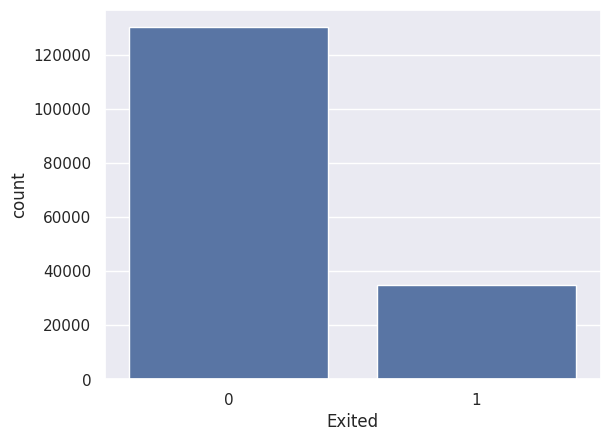

In [25]:
sns.countplot(data , x = 'Exited')

In [26]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Exited', axis = 1),data['Exited'], 
                                test_size = 0.2, 
                                shuffle = True , random_state = 42)

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(132027, 10) (132027,)
(33007, 10) (33007,)


In [27]:
transformer = ColumnTransformer(transformers=[
    ('num_transformer' , StandardScaler() , numberic_features),
    ('ord_transformer' , OrdinalEncoder() , ['Gender']),
    ('nom_transformer' , OneHotEncoder(drop = 'first') , ['Geography'])
] , remainder='passthrough')

x_train_new = transformer.fit_transform(x_train)
x_test_new = transformer.transform(x_test)
data_test_new = transformer.transform(data_test)

In [28]:
import xgboost as xgb

xgboost = xgb.XGBClassifier(n_estimators=300, random_state=42)
xgboost.fit(x_train_new, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Huấn luyện mô hình
rf.fit(x_train_new, y_train)

RandomForestClassifier(random_state=42)

In [30]:
from sklearn.metrics import classification_report , precision_score , recall_score , accuracy_score , f1_score

models = [rf , xgboost]

def evalution(models ,x_test, y_test):
    for i in models:
        y_pred = i.predict(x_test)
        
        print(i)
        
        accuracy = accuracy_score(y_test,y_pred)
        print(accuracy)
        
        precision = precision_score(y_test,y_pred)
        print(precision)

        recall = recall_score(y_test,y_pred)
        print(recall)

        f1 = f1_score(y_test,y_pred)
        print(f1)

        result = classification_report(y_test,y_pred)
        print(result)


In [31]:
evalution(models , x_test_new , y_test)

RandomForestClassifier(random_state=42)
0.8576968521828703
0.7137447936387732
0.5420560747663551
0.6161640925063333
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     26052
           1       0.71      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
     

In [32]:
data_test = data_test.drop(['id','CustomerId','Surname'], axis = 1)
data_test_new = transformer.transform(data_test)

In [33]:
y_pred_proba = xgboost.predict(data_test_new)

In [34]:
submission_pd = pd.DataFrame({'id': data_test.iloc[:,0] , 'Excited': y_pred_proba})

submission = submission_pd.to_csv('submission.csv' , index = False)

In [35]:
mlflow.set_tracking_uri("http://127.0.0.1:5001")
mlflow.autolog()
mlflow.set_experiment(experiment_id="1")

2024/11/24 10:17:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/11/24 10:17:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


MlflowException: API request to http://127.0.0.1:5001/api/2.0/mlflow/experiments/get failed with exception HTTPConnectionPool(host='127.0.0.1', port=5001): Max retries exceeded with url: /api/2.0/mlflow/experiments/get?experiment_id=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7c43d8dc8a40>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [34]:
with mlflow.start_run():
    # Khởi tạo mô hình Random Forest
    rf = RandomForestClassifier(random_state=42)
    
    # Huấn luyện mô hình
    rf.fit(x_train_new, y_train)
predictions = rf.predict(x_test)

MlflowException: API request to http://127.0.0.1:5001/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=5001): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x75e27221e780>: Failed to establish a new connection: [Errno 111] Connection refused'))